In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 1000

In [2]:
df = pd.read_csv('covid-19_vaccine_tweets_with_sentiment.csv', encoding='unicode_escape', sep=",")

In [3]:
df = df.drop('tweet_id', axis=1)
df
# Negative = 1, neutral = 2, positive = 3

,label,tweet_text
0,1,"4,000 a day dying from the so called Covid-19 ..."
1,2,Pranam message for today manifested in Dhyan b...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."
...,...,...
5995,2,@Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...
5996,3,So happy to be fully vaccinated against COVID-...
5997,2,Serum Institute of India announces cost of Cov...
5998,1,@___batshitcrazy @BarrowfordHead @Bectully I h...


In [4]:
df['tweet_text'][1]

'Pranam message for today manifested in Dhyan by @meenapranam #truth #love #karm #light #nature #consciousness #FridayThoughts #fridaymorning #CoronavirusIndia #COVID19India #?????_???????? #navratri #Thane #AmbedkarJayanti2021 #ModiJi #NarendraModi #SecondCOVIDWave #Covaxin https://t.co/bQNoMVowJg'

In [5]:
import re
import string
# nltk to biblioteka DO PRZETWARZANIA JĘZYKA (NATURAL LNG TOOLKIT)
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from tqdm import tqdm
from nltk import sent_tokenize,word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/jupyter-
[nltk_data]     alegra16/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter-
[nltk_data]     alegra16/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jupyter-
[nltk_data]     alegra16/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jupyter-
[nltk_data]     alegra16/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [9]:
main = []

# Storing all punctuations using RE library like !;,"% etc
re_puncs = re.compile('[%s]' % re.escape(string.punctuation))
# Storing all stop words like a, an, the, when, there, this etc
stop_word  = set(stopwords.words('english'))
stop_word.add('http')
print(stop_word)
print(re_puncs)

{'nor', 'don', 'wasn', 'again', 'himself', 'hadn', 'few', 've', 'as', 'haven', 'while', 'further', 'me', 'through', "weren't", 'doing', 'over', 'ourselves', 'then', 'am', 'if', 'why', 'most', 'very', 'has', 'same', 'itself', 'aren', 'yourselves', 'being', "won't", 'no', 'mightn', 't', 'against', 'by', 'won', 'at', 'is', "should've", 'o', 'were', 'him', "you'll", 'shouldn', 'he', 'myself', 'they', 'couldn', 're', 'own', 'you', 'hers', 's', 'she', 'd', 'a', 'didn', "shouldn't", 'yourself', 'weren', 'our', 'doesn', 'these', 'into', 'that', "wasn't", 'was', 'between', 'and', 'themselves', "didn't", 'who', 'had', 'whom', 'to', 'only', 'them', 'the', 'ours', 'each', 'll', 'above', 'other', "wouldn't", 'when', 'which', 'all', 'been', 'down', 'too', 'hasn', 'once', 'should', 'during', 'how', 'before', 'do', 'yours', "couldn't", 'just', "hasn't", 'his', "that'll", 'her', 'having', 'those', 'so', 'wouldn', 'http', 'we', 'be', 'their', 'its', 'i', 'in', 'here', 'for', 'such', 'mustn', 'but', "hav

In [7]:
sentences_listed = [line.split(" ") for line in df['tweet_text']]

import gensim

word_model = gensim.models.Word2Vec(sentences = sentences_listed, vector_size = 10)
words = list(word_model.wv.key_to_index)
print(len(words))

3214


- Ostateczny wynik to liczba słów wytrenowanych w modelu Word2Vec o wymiarze wektorowym 10. 
- Importuje bibliotekę Gensim, która jest używana do przetwarzania tekstu i trenowania modeli Word2Vec.
- sentences_listed = [line.split(" ") for line in df['tweet_text']]: Tworzy listę list, gdzie każda lista reprezentuje jedno zdanie (linię tekstu) z kolumny 'tweet_text'. Zdania są podzielone na słowa za pomocą metody split ze znakiem spacji jako separatorem.
    

In [41]:
word_model.wv.most_similar("China")

# po co to robić? aby zobaczyć w jakim  świecie żyje ten model językowy. Np gdybyśmy wzieli Mein Kampf to o Żydach byśmy dowiedzieli się że są głupi.

[('vaccines.', 0.9983315467834473),
 ('n', 0.9965011477470398),
 ('per', 0.9962154030799866),
 ('cost', 0.996206521987915),
 ('billion', 0.9954214096069336),
 ('clinical', 0.9953092932701111),
 ('drive', 0.9951562285423279),
 ('supply', 0.9949344992637634),
 ('2021', 0.9948658347129822),
 ('US', 0.9948211312294006)]

In [10]:
# Making Lemmatizing object
lem = WordNetLemmatizer()
# Using Porter Stemmer - obcięcie przedrostków i przyrostków tak, aby dotrzeć do rdzenia słowa
p_stem = PorterStemmer()


# Traversing whole dataset
for i in tqdm(range(len(df['tweet_text']))):
    # Tokenization
    tokens = word_tokenize(str(df['tweet_text'][i]))
    # Converting all characters to lower case
    tokens = [w.lower() for w in tokens]
    # Remove all punctuations from sentenses 
    tokens = [re_puncs.sub('', w) for w in tokens] 
    # Checking all words is alphabets or not
    tokens = [i for i in tokens if i.isalpha()]
    # Doing Lemmatizing of words
    tokens = [lem.lemmatize(w) for w in tokens]
    # Stemming process
    tokens = [p_stem.stem(w) for w in tokens]
    # Removing all stop words from the sentenses
    tokens = [w for w in tokens if w not in stop_word]
    # Finally convert to string
    r = ' '.join(tokens)
    # Storing the final string into main list
    main.append(r)

100%|██████████| 6000/6000 [00:04<00:00, 1239.88it/s]


In [11]:
df['translated'] = main
df

,label,tweet_text,translated
0,1,"4,000 a day dying from the so called Covid-19 ...",day die call dailybeast report vaccin pfizerva...
1,2,Pranam message for today manifested in Dhyan b...,pranam messag today manifest dhyan meenapranam...
2,2,Hyderabad-based ?@BharatBiotech? has sought fu...,hyderabadbas bharatbiotech ha sought fund gove...
3,1,"Confirmation that Chinese #vaccines ""dont hav...",confirm chines vaccin veri high protect rate a...
4,3,"Lab studies suggest #Pfizer, #Moderna vaccines...",lab studi suggest pfizer moderna vaccin protec...
...,...,...,...
5995,2,@Swamy39 Dr. @Swamy39 jee :\n\nMany people lik...,dr jee mani peopl like get covaxin vaccin done...
5996,3,So happy to be fully vaccinated against COVID-...,happi fulli vaccin readi serv vaccineswork vac...
5997,2,Serum Institute of India announces cost of Cov...,serum institut india announc cost covishield v...
5998,1,@___batshitcrazy @BarrowfordHead @Bectully I h...,batshitcrazi barrowfordhead bectulli mine yest...


In [12]:
df['translated'][1]

'pranam messag today manifest dhyan meenapranam truth love karm light natur conscious fridaythought fridaymorn coronavirusindia navratri thane modiji narendramodi secondcovidwav covaxin tcobqnomvowjg'

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = 13399, oov_token = "<00V>")
tokenizer.fit_on_texts(df['translated'])

In [17]:
from collections import Counter
cnt = Counter()
for text in df['translated'].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(100)

[('vaccin', 4973),
 ('moderna', 2367),
 ('covaxin', 1445),
 ('sputnikv', 1091),
 ('get', 829),
 ('pfizer', 771),
 ('pfizerbiontech', 751),
 ('thi', 748),
 ('first', 728),
 ('covidvaccin', 695),
 ('dose', 681),
 ('amp', 642),
 ('shot', 592),
 ('ha', 590),
 ('covid', 572),
 ('got', 539),
 ('effect', 504),
 ('today', 478),
 ('astrazeneca', 430),
 ('coronaviru', 422),
 ('india', 418),
 ('russia', 410),
 ('receiv', 385),
 ('sinopharm', 383),
 ('sinovac', 360),
 ('wa', 360),
 ('oxfordastrazeneca', 351),
 ('day', 345),
 ('peopl', 345),
 ('second', 339),
 ('use', 332),
 ('u', 328),
 ('one', 322),
 ('covishield', 308),
 ('case', 307),
 ('approv', 302),
 ('new', 294),
 ('countri', 294),
 ('thank', 287),
 ('like', 277),
 ('canada', 270),
 ('jab', 263),
 ('china', 259),
 ('take', 258),
 ('feel', 255),
 ('nt', 254),
 ('busi', 251),
 ('health', 242),
 ('report', 240),
 ('hope', 240),
 ('whi', 228),
 ('million', 224),
 ('say', 221),
 ('lockdown', 220),
 ('onli', 217),
 ('bharatbiotech', 216),
 ('sput

In [18]:
print(len(tokenizer.word_counts))

13392


In [57]:
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Calculate the mean number of words in each row
print(df['word_count'].mean())

26.621833333333335


In [61]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['sentiment_cat']=label_encoder.fit_transform(df['label'])
X_train, X_test, y_train, y_test = train_test_split(df["translated"], df['sentiment_cat'], train_size = 0.8, random_state=2)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train, maxlen=25, padding="post")
X_test_pad = pad_sequences(X_test, maxlen=25, padding="post")

In [62]:
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU
from tensorflow.keras.layers import Embedding, Flatten
from tensorflow.keras.regularizers import l2


n_words = 50000
max_words = 25


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 25, 16)            800000    
                                                                 
 flatten_25 (Flatten)        (None, 400)               0         
                                                                 
 dense_54 (Dense)            (None, 256)               102656    
                                                                 
 dense_55 (Dense)            (None, 3)                 771       
                                                                 
Total params: 903,427
Trainable params: 903,427
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
150/150 [==============================] - 2s 8ms/step - loss: 1.4749 - accuracy: 0.6179 - val_loss: 0.8312 - val_accuracy: 0.6117
Epoch 2/1000
150/150 [=============

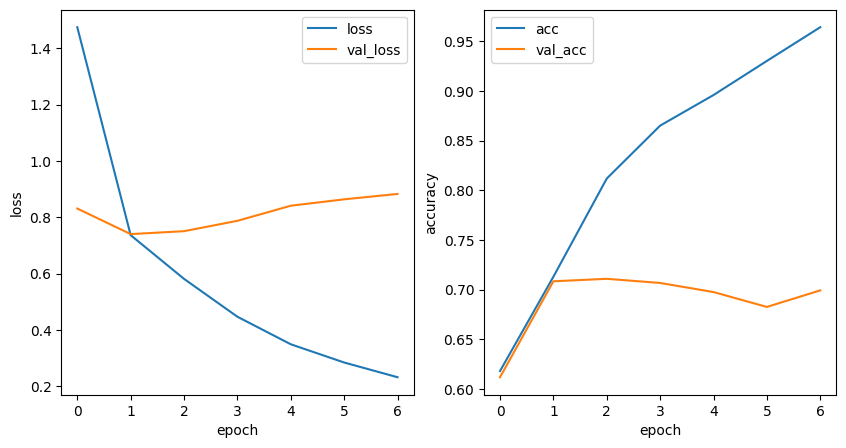

In [63]:
from tensorflow.keras.layers import Embedding, Flatten
model = Sequential()
model.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
# For your model, output_dim is set to 16, meaning each word in the vocabulary will be represented as a 16-dimensional vector.
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(3, activation='softmax'))
# softmax for multiclass clasification problems
model.summary()

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 25, 16)            800000    
                                                                 
 gru_4 (GRU)                 (None, 32)                4800      
                                                                 
 flatten_26 (Flatten)        (None, 32)                0         
                                                                 
 dense_56 (Dense)            (None, 256)               8448      
                                                                 
 dense_57 (Dense)            (None, 3)                 771       
                                                                 
Total params: 814,019
Trainable params: 814,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2024-01-21 21:16:20.284555: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-21 21:16:20.285556: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-21 21:16:20.286708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

148/150 [============================>.] - ETA: 0s - loss: 1.0634 - accuracy: 0.6140

2024-01-21 21:16:24.052666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-21 21:16:24.053686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-21 21:16:24.054867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 4s 19ms/step - loss: 1.0612 - accuracy: 0.6131 - val_loss: 0.8784 - val_accuracy: 0.6008
Epoch 2/1000
150/150 [==============================] - 3s 17ms/step - loss: 0.8574 - accuracy: 0.6165 - val_loss: 0.8505 - val_accuracy: 0.6008
Epoch 3/1000
150/150 [==============================] - 3s 17ms/step - loss: 0.7216 - accuracy: 0.6946 - val_loss: 0.7409 - val_accuracy: 0.6842
Epoch 4/1000
150/150 [==============================] - 3s 17ms/step - loss: 0.5279 - accuracy: 0.8025 - val_loss: 0.8504 - val_accuracy: 0.6692
Epoch 5/1000
150/150 [==============================] - 3s 17ms/step - loss: 0.4228 - accuracy: 0.8452 - val_loss: 0.8860 - val_accuracy: 0.7017
Epoch 6/1000
150/150 [==============================] - 2s 17ms/step - loss: 0.3470 - accuracy: 0.8735 - val_loss: 0.9889 - val_accuracy: 0.6858
Epoch 7/1000
150/150 [==============================] - 3s 17ms/step - loss: 0.3067 - accuracy: 0.8875 - val_loss: 1.1963 - val_accuracy: 0.667

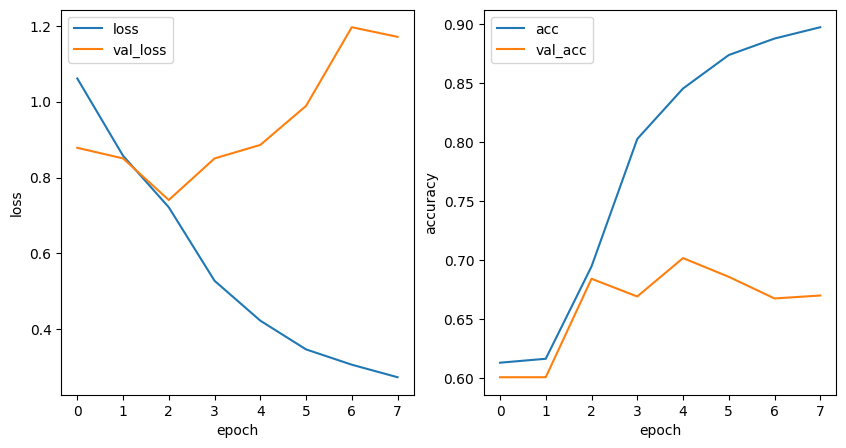

In [64]:
modelGRU = Sequential()
modelGRU.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
modelGRU.add(GRU(32))
modelGRU.add(Flatten())
modelGRU.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
modelGRU.add(Dense(3, activation='softmax'))
modelGRU.summary()

modelGRU.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historyGRU = modelGRU.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

histGRU = pd.DataFrame(historyGRU.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histGRU.loss, label = "loss")
plt.plot(histGRU.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(histGRU.accuracy, label = "acc")
plt.plot(histGRU.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 20, 16)            800000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 flatten_20 (Flatten)        (None, 32)                0         
                                                                 
 dense_45 (Dense)            (None, 3)                 99        
                                                                 
Total params: 806,371
Trainable params: 806,371
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000


2024-01-21 21:03:17.834827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-21 21:03:17.835865: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-21 21:03:17.837049: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - ETA: 0s - loss: 0.8640 - accuracy: 0.6160

2024-01-21 21:03:21.197201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-01-21 21:03:21.198200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-01-21 21:03:21.199364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

150/150 [==============================] - 4s 17ms/step - loss: 0.8640 - accuracy: 0.6160 - val_loss: 0.8166 - val_accuracy: 0.6033
Epoch 2/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.6765 - accuracy: 0.7175 - val_loss: 0.7257 - val_accuracy: 0.6783
Epoch 3/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.5007 - accuracy: 0.8021 - val_loss: 0.8121 - val_accuracy: 0.6800
Epoch 4/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.3644 - accuracy: 0.8521 - val_loss: 0.8904 - val_accuracy: 0.6783
Epoch 5/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.2478 - accuracy: 0.9102 - val_loss: 0.9870 - val_accuracy: 0.6650
Epoch 6/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.1721 - accuracy: 0.9433 - val_loss: 1.1744 - val_accuracy: 0.6500
Epoch 7/1000
150/150 [==============================] - 2s 14ms/step - loss: 0.1286 - accuracy: 0.9548 - val_loss: 1.2770 - val_accuracy: 0.662

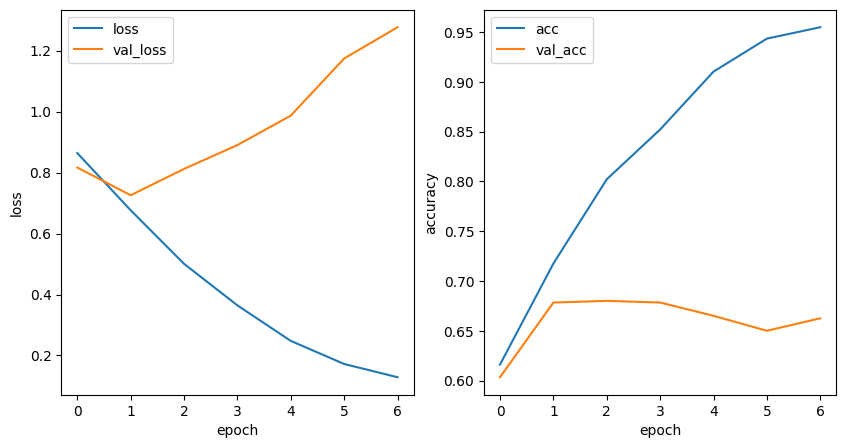

In [50]:
modelLSTM = Sequential()
modelLSTM.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
modelLSTM.add(LSTM(32))
modelLSTM.add(Flatten())
modelGRU.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
modelLSTM.add(Dense(3, activation='softmax'))
modelLSTM.summary()

modelLSTM.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historyLSTM = modelLSTM.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

histLSTM = pd.DataFrame(historyLSTM.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histLSTM.loss, label = "loss")
plt.plot(histLSTM.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(histLSTM.accuracy, label = "acc")
plt.plot(histLSTM.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 20, 16)            800000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 flatten_21 (Flatten)        (None, 32)                0         
                                                                 
 dense_46 (Dense)            (None, 256)               8448      
                                                                 
 dense_47 (Dense)            (None, 3)                 771       
                                                                 
Total params: 810,787
Trainable params: 810,787
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
150/150 [=========================

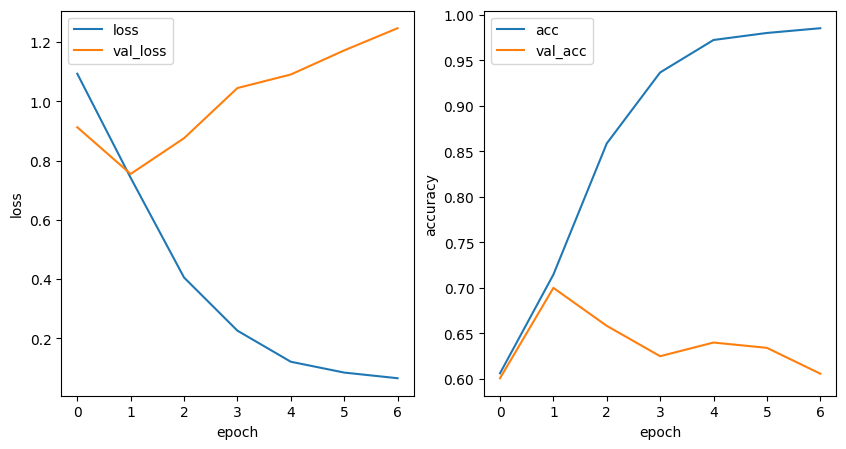

In [51]:
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim = n_words, output_dim = 16, input_length = max_words))
modelRNN.add(SimpleRNN(32))
modelRNN.add(Flatten())
modelRNN.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
modelRNN.add(Dense(3, activation='softmax'))
modelRNN.summary()

modelRNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
historyRNN = modelRNN.fit(X_train_pad,y_train, epochs = EPOCHS, validation_data = (X_test_pad,y_test), callbacks = [es])

histRNN = pd.DataFrame(historyRNN.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(histRNN.loss, label = "loss")
plt.plot(histRNN.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(histRNN.accuracy, label = "acc")
plt.plot(histRNN.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()